In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Data Visualisation and Preprocessing**

In [4]:
display(data.describe())
display(data.info())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

No null values detected! and all are numbers

In [5]:
data.drop_duplicates(inplace = True)

In [6]:
data.shape

(302, 14)

Only 1 duplicate value as data went from 303 rows to 302 rows

In [7]:
print(data['output'].value_counts())

output
1    164
0    138
Name: count, dtype: int64


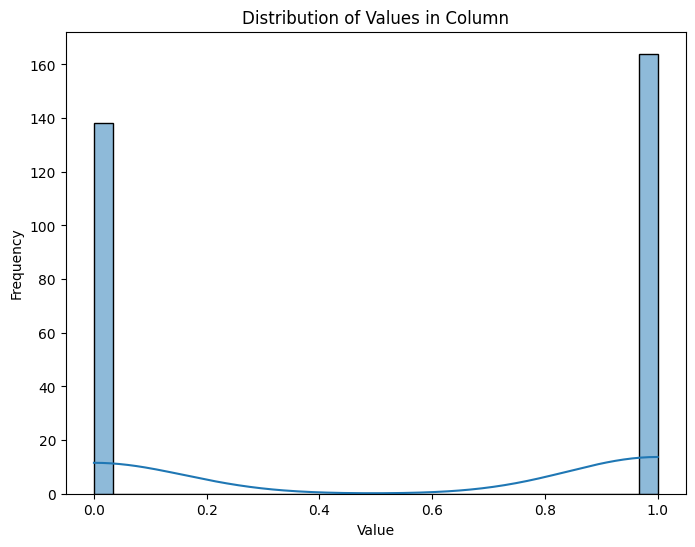

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['output'], kde=True, bins=30)
plt.title('Distribution of Values in Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

* **Plot graphs to check data distribution**

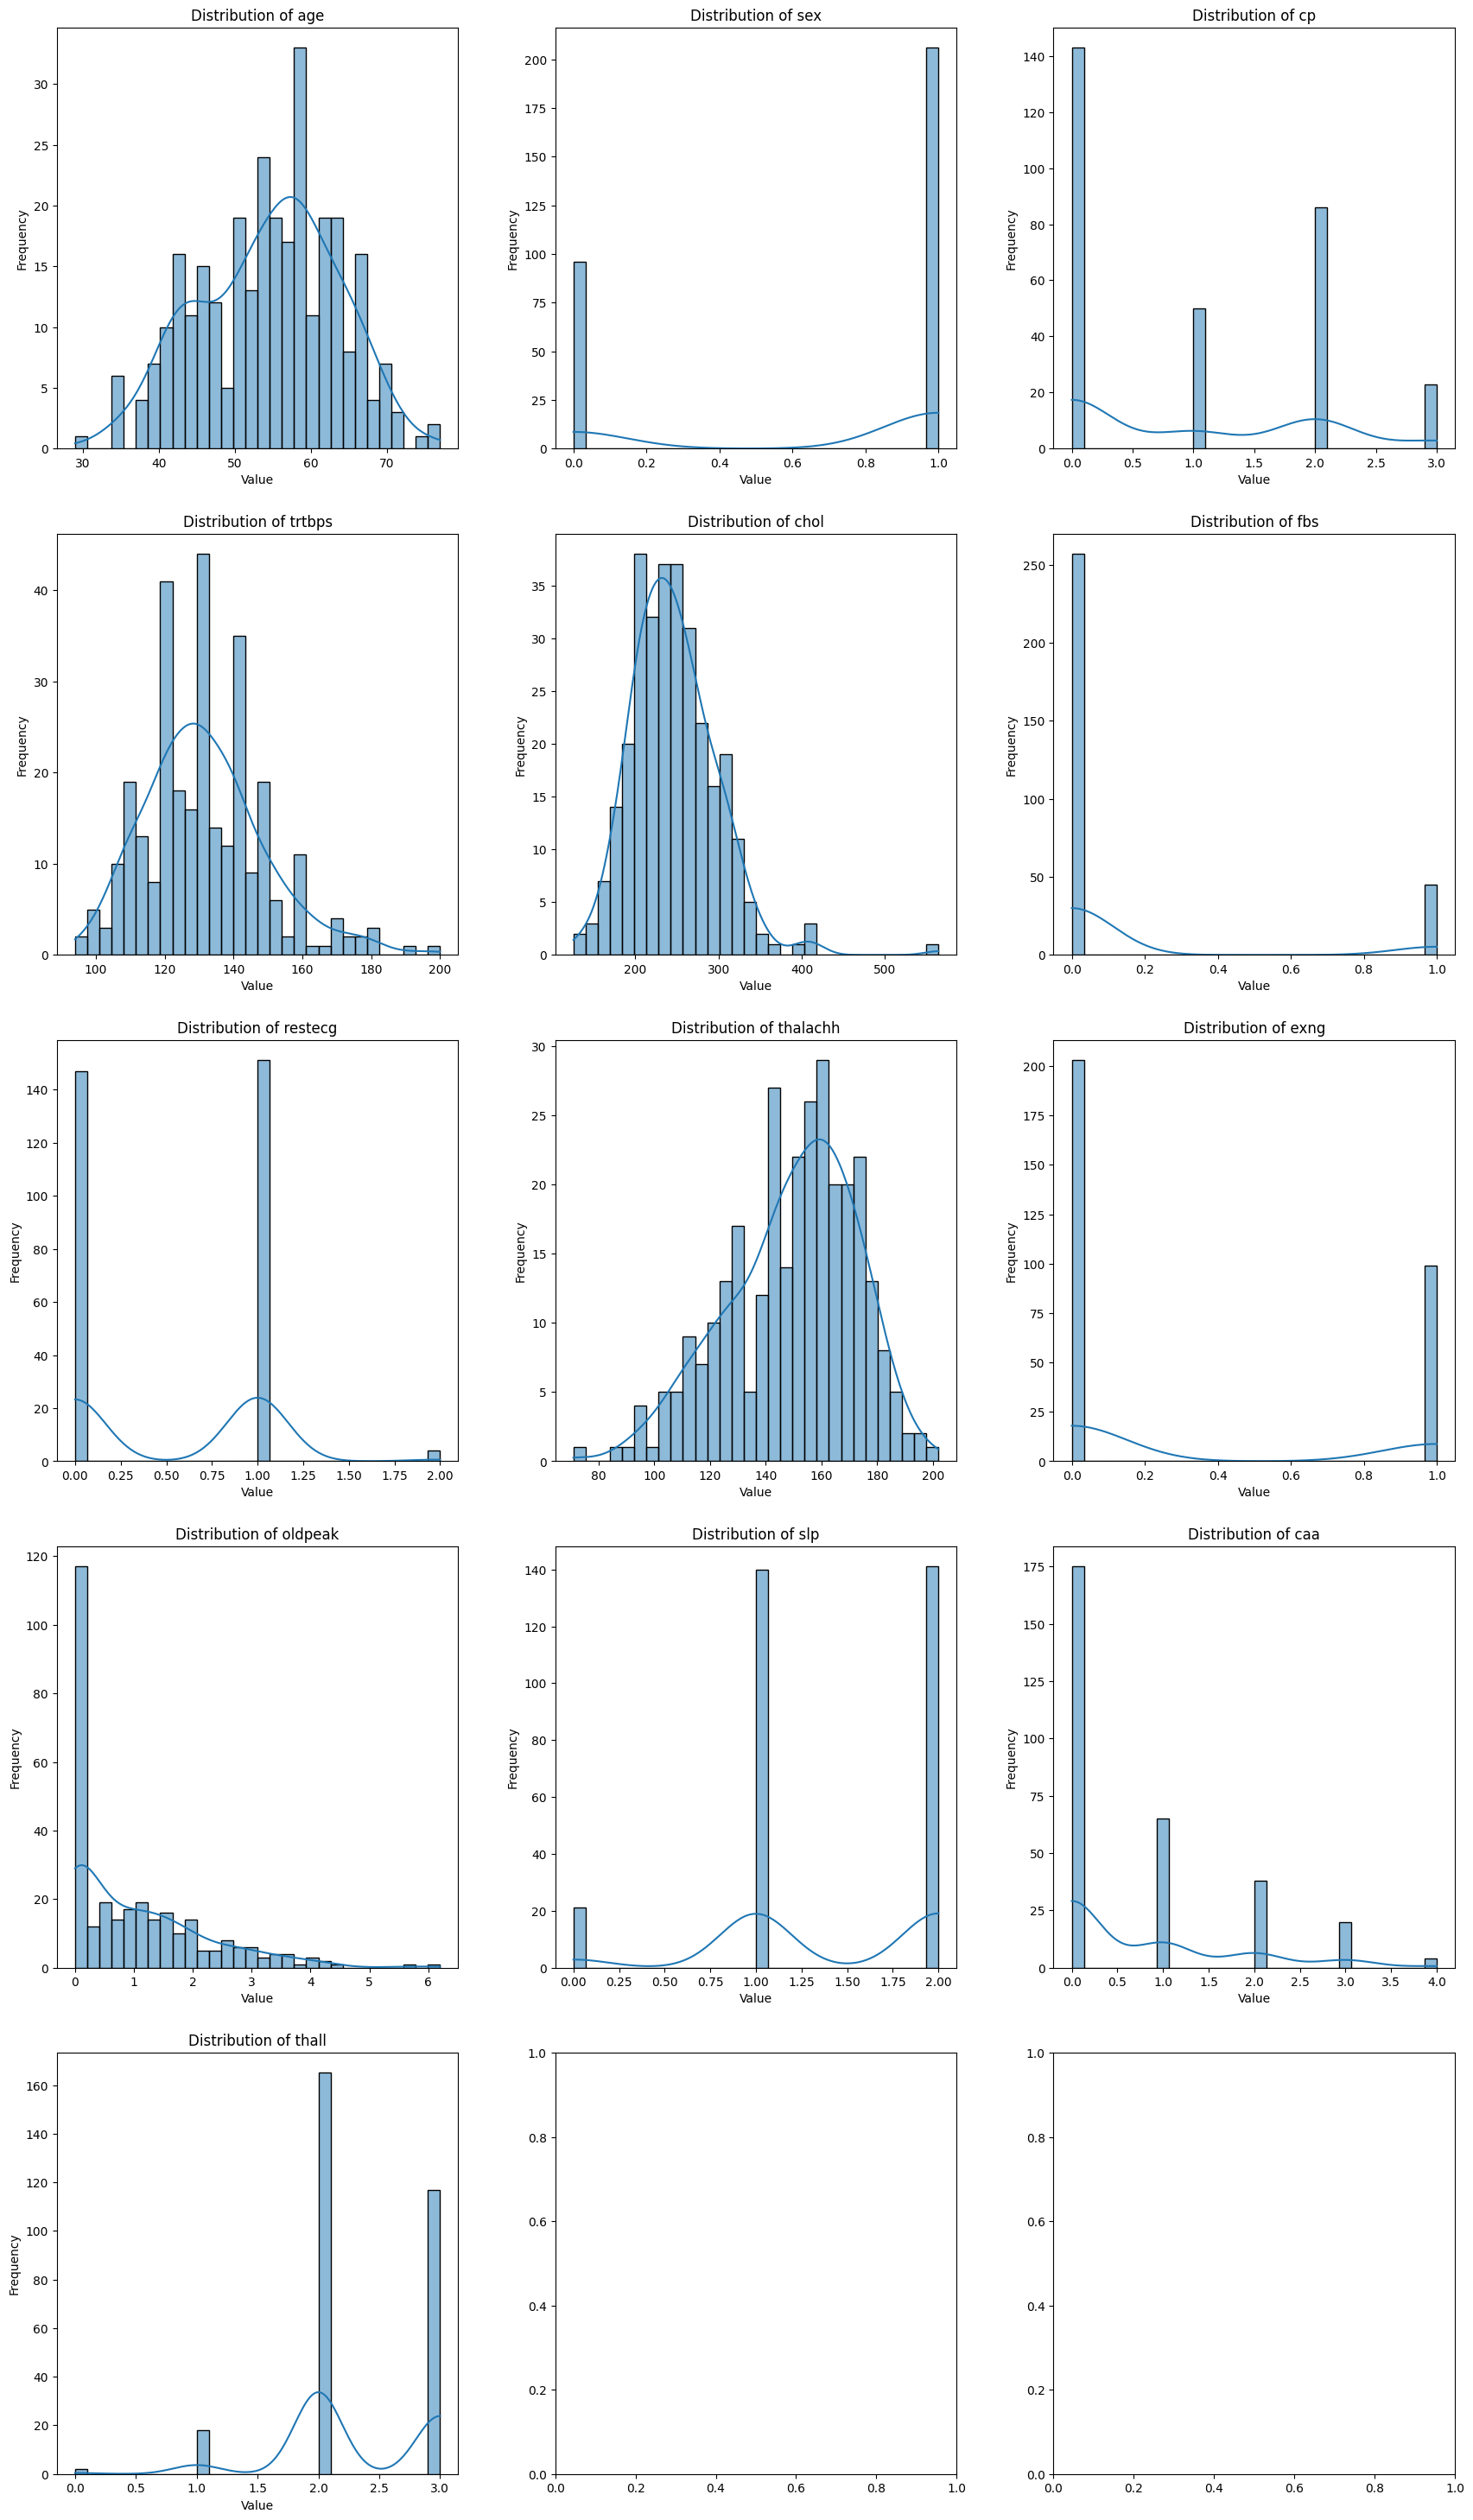

In [9]:
num_cols = 3
num_rows = (len(data.columns) - 1) // num_cols + 1  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
fig.tight_layout(pad=5.0) 
axes = axes.flatten()

for idx, column in enumerate(data.columns[:-1]):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[idx]) 
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

plt.show()

* **Plot Correlation matrix and remove highly correlated columns**

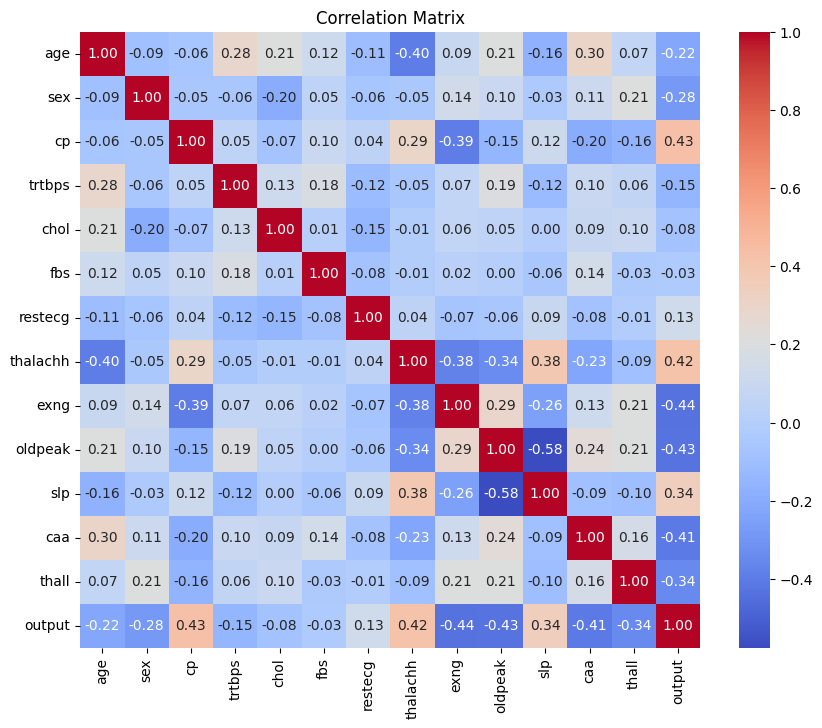

Columns to drop based on correlation threshold of 0.9: []
Dataframe after removing highly correlated columns:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [10]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

threshold = 0.9

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]

print(f"Columns to drop based on correlation threshold of {threshold}: {to_drop}")

data = data.drop(columns=to_drop)

print("Dataframe after removing highly correlated columns:")
print(data.head())


No columns in our data have a correlation value >= .9 so none have been dropped here

* **Outlier Removal**

Since data is not normally distributed I am using quantile to remove outliers

In [11]:
# Define quantile thresholds
lower_bound = 0.01  # 1st percentile
upper_bound = 0.99  # 99th percentile

for column in data.columns[:-1]:
    lower_quantile = data[column].quantile(lower_bound)
    upper_quantile = data[column].quantile(upper_bound)

    data = data[(data[column] >= lower_quantile) & (data[column] <= upper_quantile)]

print(data.shape)
print(data.describe())


(273, 14)
              age         sex          cp      trtbps        chol         fbs  \
count  273.000000  273.000000  273.000000  273.000000  273.000000  273.000000   
mean    54.410256    0.695971    0.959707  131.333333  246.553114    0.142857   
std      8.707259    0.460840    1.033549   16.529237   45.279990    0.350570   
min     35.000000    0.000000    0.000000  100.000000  149.000000    0.000000   
25%     48.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     56.000000    1.000000    1.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     71.000000    1.000000    3.000000  180.000000  407.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  273.000000  273.000000  273.000000  273.000000  273.000000  273.000000   
mean     0.512821  149.732601    0.322344    1.011355    1.413919    0.710623   
std      0.500754

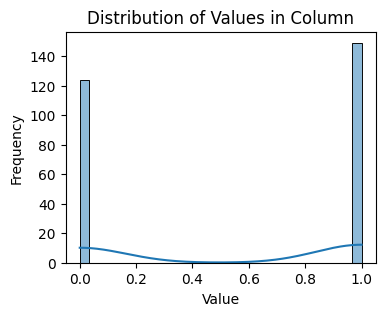

In [12]:
# Checking for final distribution amongst classes
plt.figure(figsize=(4, 3))
sns.histplot(data['output'], kde=True, bins=30)
plt.title('Distribution of Values in Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
print(data['output'].value_counts())

output
1    149
0    124
Name: count, dtype: int64


Values for both classes are comparable but lets use smote

* **SMOTE and Split data**

In [14]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1] 
y = data.iloc[:, -1]  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [15]:
from collections import Counter
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))

Original class distribution: Counter({1: 118, 0: 100})
Resampled class distribution: Counter({1: 118, 0: 118})


Data has been resampled and all classes have equal values now

# **Random Forest Classifier**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = rf_classifier.predict(X_test_scaled)

In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[18  6]
 [ 4 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.82      0.87      0.84        31

    accuracy                           0.82        55
   macro avg       0.82      0.81      0.81        55
weighted avg       0.82      0.82      0.82        55



# **XGBoost**

In [18]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_classifier.predict(X_test_scaled)

In [19]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[20  4]
 [ 4 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.87      0.87      0.87        31

    accuracy                           0.85        55
   macro avg       0.85      0.85      0.85        55
weighted avg       0.85      0.85      0.85        55



# **HyperParamter Tuning**

* **GridSearch Random Forest**

In [20]:
common_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
}

In [21]:
from sklearn.model_selection import GridSearchCV
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                               param_grid=common_param_grid,
                               cv=5, 
                               scoring='accuracy', 
                               verbose=True)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=True)

In [22]:
print("Best Hyperparameters for Random Forest:")
print(rf_grid_search.best_params_)

Best Hyperparameters for Random Forest:
{'max_depth': 5, 'n_estimators': 150}


In [23]:
rf_best = rf_grid_search.best_estimator_
rf_y_pred = rf_best.predict(X_test_scaled)

In [24]:
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Confusion Matrix:
[[20  4]
 [ 5 26]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.87      0.84      0.85        31

    accuracy                           0.84        55
   macro avg       0.83      0.84      0.83        55
weighted avg       0.84      0.84      0.84        55



* **GridSearch XGBoost**

In [25]:
xgb_grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), 
                                param_grid=common_param_grid,
                                cv=5, 
                                scoring='accuracy', 
                                verbose=True)
xgb_grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=True)

In [26]:
print("Best Hyperparameters for XGBoost:")
print(xgb_grid_search.best_params_)

Best Hyperparameters for XGBoost:
{'max_depth': 10, 'n_estimators': 100}


In [27]:
xgb_best = xgb_grid_search.best_estimator_
xgb_y_pred = xgb_best.predict(X_test_scaled)

In [28]:
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_y_pred))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))

XGBoost Confusion Matrix:
[[19  5]
 [ 3 28]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.85      0.90      0.88        31

    accuracy                           0.85        55
   macro avg       0.86      0.85      0.85        55
weighted avg       0.86      0.85      0.85        55

